In [69]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [70]:
#导入数据
n_train,n_test,num_inputs,batch_size=20,100,200,5
true_w,true_b=torch.ones(num_inputs,1)*0.01,0.05
train_data=d2l.synthetic_data(true_w,true_b,n_train)
train_iter=d2l.load_array(train_data,batch_size)
test_data=d2l.synthetic_data(true_w,true_b,n_test)
test_iter=d2l.load_array(test_data,batch_size,is_train=False)

In [71]:
#初始化权重和偏置
def init_params():
    w=torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
    b=torch.ones(1,requires_grad=True)
    return w,b

In [72]:
#定义惩罚项
def l2_penalty(w):
    return torch.sum(w.pow(2))/2

In [73]:
#训练过程
def train(lambd):
    w,b=init_params()
    net,loss=lambda X:d2l.linreg(X,w,b),d2l.squared_loss
    num_epochs,lr=100,0.03
    animator = d2l.Animator(xlabel='epoch',ylabel='loss',yscale='log',xlim=[5,num_epochs],legend=['train','test'])
    for epoch in range(num_epochs):
        for X,y in train_iter:
            l=loss(net(X),y)+lambd*l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w,b],lr,batch_size)
        if (epoch+1)%5==0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net,test_iter,loss)))
    print('w的l2范数是：',torch.norm(w).item())#norm专门求l2范数的函数

In [74]:
help(d2l.synthetic_data) # 查看函数用法

Help on function synthetic_data in module d2l.torch:

synthetic_data(w, b, num_examples)
    Generate y = Xw + b + noise.
    
    Defined in :numref:`sec_linear_scratch`



w的l2范数是： 13.983019828796387


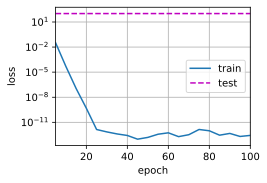

In [75]:
train(lambd=0)

w的l2范数是： 0.07798003405332565


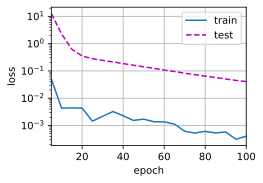

In [76]:
train(lambd=1.5)

w的l2范数是： 0.040097471326589584


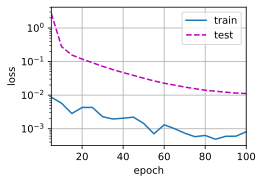

In [77]:
train(lambd=3)

In [78]:
def train_concise(wd):
    net=nn.Sequential(nn.Linear(num_inputs,1))
    for param in net[0].parameters():
        param.data.normal_()
    loss=nn.MSELoss()
    num_epochs,lr=100,0.003
    trainer=torch.optim.SGD([{"params":net[0].weight,"weight_decay":wd},{"params":net[0].bias}],lr=lr)
    animator = d2l.Animator(xlabel='epoch',ylabel='loss',yscale='log',xlim=[5,num_epochs],legend=['train','test'])                   
    for epoch in range(num_epochs):
        for X,y in train_iter:
            trainer.zero_grad()
            l = loss(net(X),y)
            l.backward()
            trainer.step()
        if (epoch+1)%5==0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net,test_iter,loss)))
    print("w的l2范数是：",net[0].weight.norm().item())

w的l2范数是： 13.839651107788086


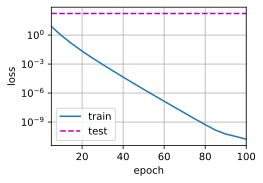

In [79]:
train_concise(0)

w的l2范数是： 2.15008807182312


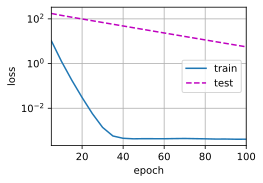

In [80]:
train_concise(1.5)

w的l2范数是： 0.39613771438598633


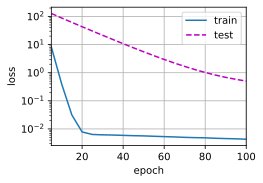

In [81]:
train_concise(3)